### Importing the Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ace_tools_open as tools
import math

from extract_label import parse_sas_html
from pprint import pprint

In [2]:
# Configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_columns', 500)

# Filter Warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 350 entries, _STATE to _DRNKDRV
dtypes: float64(345), int64(5)
memory usage: 1.1 GB


In [4]:
print(f"Number of feature: {df.shape[1]} features")
print(f"Number of row: {len(df)} rows")
df.head()

Number of feature: 350 features
Number of row: 433323 rows


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,NUMADULT,RESPSLC1,LANDSEX2,LNDSXBRT,SAFETIME,CTELNUM1,CELLFON5,CADULT1,CELLSEX2,CELSXBRT,PVTRESD3,CCLGHOUS,CSTATE1,LANDLINE,HHADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,PRIMINS1,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,EXRACT12,EXEROFT1,EXERHMM1,EXRACT22,EXEROFT2,EXERHMM2,STRENGTH,BPHIGH6,BPMEDS1,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,ASTHNOW,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,DIABAGE4,MARITAL,EDUCA,RENTHOM1,NUMHHOL4,NUMPHON4,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,PREGNANT,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,FALL12MN,FALLINJ5,SMOKE100,SMOKDAY2,USENOW3,ECIGNOW2,ALCDAY4,AVEDRNK3,DRNK3GE5,MAXDRNKS,FLUSHOT7,FLSHTMY3,PNEUVAC4,SHINGLE2,HIVTST7,HIVTSTD3,SEATBELT,DRNKDRI2,COVIDPO1,COVIDSM1,COVIDACT,PDIABTS1,PREDIAB2,DIABTYPE,INSULIN1,CHKHEMO3,EYEEXAM1,DIABEYE1,DIABEDU1,FEETSORE,ARTHEXER,ARTHEDU,LMTJOIN3,ARTHDIS2,JOINPAI2,LCSFIRST,LCSLAST,LCSNUMCG,LCSCTSC1,LCSSCNCR,LCSCTWHN,HADMAM,HOWLONG,CERVSCRN,CRVCLCNC,CRVCLPAP,CRVCLHPV,HADHYST2,PSATEST1,PSATIME1,PCPSARS2,PSASUGS1,PCSTALK2,HADSIGM4,COLNSIGM,COLNTES1,SIGMTES1,LASTSIG4,COLNCNCR,VIRCOLO1,VCLNTES2,SMALSTOL,STOLTEST,STOOLDN2,BLDSTFIT,SDNATES1,CNCRDIFF,CNCRAGE,CNCRTYP2,CSRVTRT3,CSRVDOC1,CSRVSUM,CSRVRTRN,CSRVINST,CSRVINSR,CSRVDEIN,CSRVCLIN,CSRVPAIN,CSRVCTL2,INDORTAN,NUMBURN3,SUNPRTCT,WKDAYOUT,WKENDOUT,CIMEMLO1,CDWORRY,CDDISCU1,CDHOUS1,CDSOCIA1,CAREGIV1,CRGVREL4,CRGVLNG1,CRGVHRS1,CRGVPRB3,CRGVALZD,CRGVPER1,CRGVHOU1,CRGVEXPT,LASTSMK2,STOPSMK2,MENTCIGS,MENTECIG,HEATTBCO,FIREARM5,GUNLOAD,LOADULK2,HASYMP1,HASYMP2,HASYMP3,HASYMP4,HASYMP5,HASYMP6,STRSYMP1,STRSYMP2,STRSYMP3,STRSYMP4,STRSYMP5,STRSYMP6,FIRSTAID,ASPIRIN,BIRTHSEX,SOMALE,SOFEMALE,TRNSGNDR,MARIJAN1,MARJSMOK,MARJEAT,MARJVAPE,MARJDAB,MARJOTHR,USEMRJN4,ACEDEPRS,ACEDRINK,ACEDRUGS,ACEPRISN,ACEDIVRC,ACEPUNCH,ACEHURT1,ACESWEAR,ACETOUCH,ACETTHEM,ACEHVSEX,ACEADSAF,ACEADNED,IMFVPLA4,HPVADVC4,HPVADSHT,TETANUS1,COVIDVA1,COVACGE1,COVIDNU2,LSATISFY,EMTSUPRT,SDLONELY,SDHEMPLY,FOODSTMP,SDHFOOD1,SDHBILLS,SDHUTILS,SDHTRNSP,SDHSTRE1,RRCLASS3,RRCOGNT2,RRTREAT,RRATWRK2,RRHCARE4,RRPHYSM2,RCSGEND1,RCSXBRTH,RCSRLTN2,CASTHDX2,CASTHNO2,QSTVER,QSTLANG,_METSTAT,_URBSTAT,MSCODE,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_CHISPNC,_CRACE1,CAGEG,_CLLCPWT,_DUALUSE,_DUALCOR,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPL1,_HCVU653,_TOTINDA,METVL12_,METVL22_,MAXVO21_,FC601_,ACTIN13_,ACTIN23_,PADUR1_,PADUR2_,PAFREQ1_,PAFREQ2_,_MINAC12,_MINAC22,STRFREQ_,PAMISS3_,PAMIN13_,PAMIN23_,PA3MIN_,PAVIG13_,PAVIG23_,PA3VIGM_,_PACAT3,_PAINDX3,_PA150R4,_PA300R4,_PA30023,_PASTRNG,_PAREC3,_PASTAE3,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,1.0,1.0,NaN,1.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,88.0,88.0,NaN,3.0,1.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,888.0,1.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,57.0,1.0,5.0,1.0,2.0,NaN,1.0,2.0,7.0,88.0,99.0,NaN,172.0,503.0,2.0,2.0,2.0,1.0,2.0,2.0,88.0,NaN,2.0,NaN,3.0,1.0,888.0,NaN,NaN,NaN,2.0,NaN,2.0,2.0,2.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2

In [5]:
def missing_value_summary(df: pd.DataFrame):
    missing_count = df.isna().sum()
    missing_percentage = (df.isna().mean() * 100).round(2)
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage (%)': missing_percentage
    }).sort_values(by='Missing Count', ascending=False)
    return missing_summary

In [6]:
def draw_missing_data_distribution(df: pd.DataFrame):
    plt.figure(figsize=(10,5))
    plt.hist(df["Missing Percentage (%)"], bins = 50, color='royalblue', edgecolor='black')
    plt.xlabel("Missing Percentage (%)")
    plt.ylabel("Number of Features")
    plt.title('Distribution of Missing Data Percentage Across Features')
    plt.show()

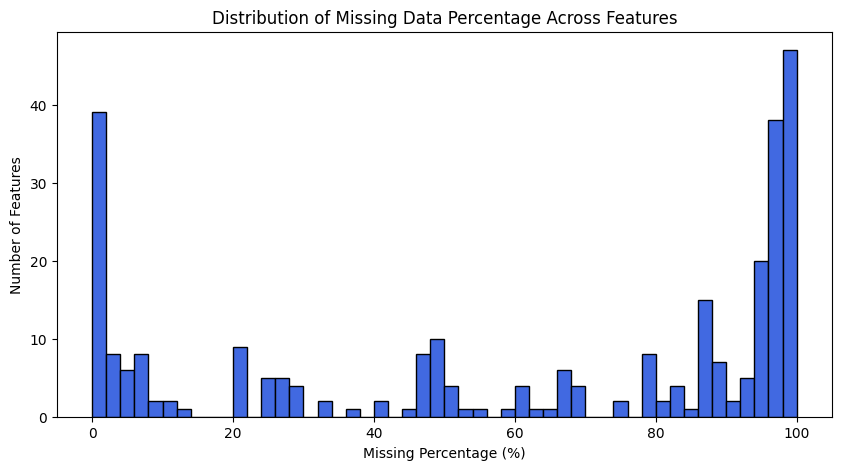

In [7]:
missing_value = missing_value_summary(df)
missing_value = missing_value[missing_value["Missing Count"] > 0]
draw_missing_data_distribution(missing_value)

#### Dropping feature which have missing value that larger than 20%

In [8]:
threshold = 20
col_to_drop = missing_value[missing_value["Missing Percentage (%)"] > threshold].index
print(f"Number of column that have more than {threshold}% missing data: {len(col_to_drop)}")
col_to_drop

Number of column that have more than 20% missing data: 221


Index(['WKDAYOUT', 'INDORTAN', 'NUMBURN3', 'SUNPRTCT', 'WKENDOUT', 'COLGHOUS',
       'LASTSIG4', 'LNDSXBRT', 'CSRVCTL2', 'VCLNTES2',
       ...
       'EXRACT12', 'CSTATE1', 'HHADULT', 'CELLSEX2', 'LANDLINE', 'PVTRESD3',
       'CADULT1', 'CTELNUM1', 'SAFETIME', 'CELLFON5'],
      dtype='object', length=221)

In [9]:
df = df.drop(columns=col_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Columns: 129 entries, _STATE to _DRNKDRV
dtypes: float64(124), int64(5)
memory usage: 426.5 MB


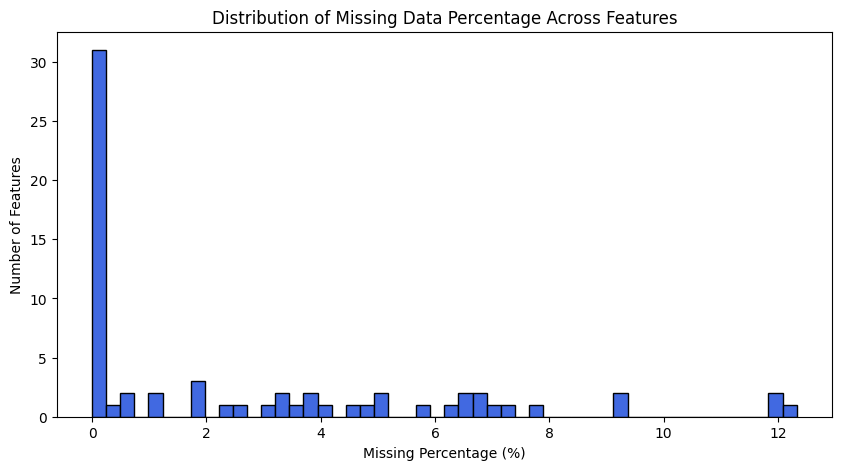

In [10]:
missing_value = missing_value_summary(df)
missing_value = missing_value[missing_value["Missing Count"] > 0]
draw_missing_data_distribution(missing_value)

#### Decode the data

In [11]:
sas_variable, value_labels = parse_sas_html("Original Data/USCODE23_LLCP_091024.HTML")


In [12]:
missing_value_summary(df)

,Missing Count,Missing Percentage (%)
CHOLMED3,53440,12.33
TOLDHI3,51812,11.96
_RFCHOL3,51811,11.96
_BMI5,40535,9.35
_BMI5CAT,40535,9.35
...,...,...
_RFBING6,0,0.00
_RFDRHV8,0,0.00
_RFSEAT2,0,0.00
_RFSEAT3,0,0.00


In [13]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,PRIMINS1,PERSDOC3,MEDCOST1,CHECKUP1,EXERANY2,STRENGTH,BPHIGH6,CHOLCHK3,TOLDHI3,CHOLMED3,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHMA3,CHCSCNC1,CHCOCNC1,CHCCOPD3,ADDEPEV3,CHCKDNY2,HAVARTH4,DIABETE4,MARITAL,EDUCA,RENTHOM1,CPDEMO1C,VETERAN3,EMPLOY1,CHILDREN,INCOME3,WEIGHT2,HEIGHT3,DEAF,BLIND,DECIDE,DIFFWALK,DIFFDRES,DIFFALON,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,FLUSHOT7,PNEUVAC4,HIVTST7,SEATBELT,COVIDPO1,QSTVER,QSTLANG,_METSTAT,_URBSTAT,_STSTR,_STRWT,_RAWRAKE,_WT2RAKE,_IMPRACE,_DUALUSE,_LLCPWT2,_LLCPWT,_RFHLTH,_PHYS14D,_MENT14D,_HLTHPL1,_HCVU653,_TOTINDA,MAXVO21_,FC601_,STRFREQ_,PAMISS3_,_PACAT3,_PAINDX3,_PA150R4,_PA300R4,_PA30023,_PASTRNG,_PAREC3,_PASTAE3,_RFHYPE6,_CHOLCH3,_RFCHOL3,_MICHD,_LTASTH1,_CASTHM1,_ASTHMS1,_DRDXAR2,_MRACE1,_HISPANC,_RACE,_RACEG21,_RACEGR3,_RACEPRV,_SEX,_AGEG5YR,_AGE65YR,_AGE80,_AGE_G,HTIN4,HTM4,WTKG3,_BMI5,_BMI5CAT,_RFBMI5,_CHLDCNT,_EDUCAG,_INCOMG1,_SMOKER3,_RFSMOK3,_CURECI2,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,3012023,3,1,2023,1100.0,2023000001,2.023000e+09,2.0,2.0,88.0,88.0,3.0,1.0,2.0,2.0,2.0,888.0,1.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,5.0,1.0,1.0,2.0,7.0,88.0,99.0,172.0,503.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,888.0,2.0,2.0,2.0,1.0,2.0,10.0,1.0,1.0,1.0,11011.0,42.791581,2.0,85.583161,1.0,1.0,941.163973,605.427887,1.0,1.0,1.0,1.0,9.0,2.0,1840.0,315.0,0.0,0.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,63.0,160.0,7802.0,3047.0,4.0,2.0,1.0,3.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
1,1.0,1.0,1062023,1,6,2023,1100.0,2023000002,2.023000e+09,2.0,2.0,88.0,88.0,3.0,1.0,2.0,2.0,1.0,888.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,5.0,1.0,1.0,2.0,7.0,88.0,99.0,132.0,409.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,1.0,2.0,1.0,2.0,10.0,1.0,1.0,1.0,11012.0,170.429390,1.0,170.429390,1.0,1.0,1874.223855,1121.992705,1.0,1.0,1.0,1.0,9.0,1.0,1803.0,309.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,13.0,2.0,80.0,6.0,57.0,145.0,5987.0,2856.0,3.0,2.0,1.0,3.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,3082023,3,8,2023,1100.0,2023000003,2.023000e+09,2.0,4.0,6.0,2.0,3.0,1.0,1.0,1.0,1.0,205.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3.0,4.0,2.0,8.0,2.0,7.0,88.0,2.0,130.0,504.0,7.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,888.0,1.0,1.0,2.0,1.0,2.0,10.0,1.0,1.0,1.0,11011.0,42.791581,1.0,42.791581,2.0,9.0,1151.603218,600.963308,2.0,2.0,2.0,1.0,9.0,1.0,1322.0,227.0,1167.0,1.0,9.0,9.0,9.0,9.0,9.0,2.0,9.0,9.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,13.0,2.0,80.0,6.0,64.0,163.0,5897.0,2231.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,3062023,3,6,2023,1100.0,2023000004,2.023000e+09,2.0,2.0,2.0,88.0,3.0,1.0,2.0,3.0,1.0,888.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,5.0,1.0,1.0,2.0,7.0,88.0,99.0,170.0,506.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,1.0,888.0,1.0,1.0,1.0,1.0,2.0,10.0,1.0,2.0,1.0,11011.0,42.791581,2.0,85.583161,1.0,1.0,941.163973,605.427887,1.0,2.0,1.0,1.0,9.0,1.0,1914.0,328.0,0.0,1.0,9.0,1.0,1.0,9.0,9.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,12.0,2.0,78.0,6.0,66.0,168.0,7711.0,2744.0,3.0,2.0,1.0,3.0,9.0,4.0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,1062023,1,6,2023,1100.0,2023000005,2.023000e+09,2.0,4.0,88.0,88.0,3.0,1.0,2.0,1.0,1.0,888.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,3.0,5.0,1.0,3.0,2.0,8.0,88.0,7.0,170.0,508.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,202.0,2.0,1.0,2.0,1.0,2.0,10.0,1.0,1.0,1.0,11011.0,42.791581,1.0,42.791581,1.0,1.0,470.581986,281.711042,2.0,1.0,1.0,1.0,9.0,1.0,1988.0,341.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,12.0,2.0,76.0,6.0,68.0,173.0,7711.0,2585.0,3.0,2.0,1

In [14]:
cols = df.columns
for col in cols:
    print(f"{col}: \t {sas_variable[col]}")

_STATE: 	 State FIPS Code
FMONTH: 	 File Month
IDATE: 	 Interview Date
IMONTH: 	 Interview Month
IDAY: 	 Interview Day
IYEAR: 	 Interview Year
DISPCODE: 	 Final Disposition
SEQNO: 	 Annual Sequence Number
_PSU: 	 Primary Sampling Unit
SEXVAR: 	 Sex of Respondent
GENHLTH: 	 General Health
PHYSHLTH: 	 Number of Days Physical Health Not Good
MENTHLTH: 	 Number of Days Mental Health Not Good
PRIMINS1: 	 What is Current Primary Source of Health Insurance?
PERSDOC3: 	 Have Personal Health Care Provider?
MEDCOST1: 	 Could Not Afford To See Doctor
CHECKUP1: 	 Length of time since last routine checkup
EXERANY2: 	 Exercise in Past 30 Days
STRENGTH: 	 How many times did you do physical activities or exercises to STRENGTHEN your muscles?
BPHIGH6: 	 Ever Told Blood Pressure High
CHOLCHK3: 	 How Long since Cholesterol Checked
TOLDHI3: 	 Ever Told Cholesterol Is High
CHOLMED3: 	 Currently taking medicine for high cholesterol
CVDINFR4: 	 Ever Diagnosed with Heart Attack
CVDCRHD4: 	 Ever Diagnosed with

### Scan and Identify Features Directly Related to Heart Disease
Since we are predicting heart disease, keep features that are risk factors or direct indicator of cardiovascular health. Relavant features might includes
- General:
    - **`SEXVAR`**: Sex of Respondent
    - **`_AGE80`**: Imputed Age value collapsed above 80
    - **`_AGEG5YR`**: IReported age in five-year age categories calculated variable
- Existing Heart Conditions:
    - **`CVDINFR4`**: Ever Diagnosed with Heart Attack
    - **`CVDCRHD4`**: Ever Diagnosed with Angina or Coronary Heart Disease
    - **`CVDSTRK3`**: Ever Diagnosed with a Stroke
- Cholesterol and Blood Pressure:
    - **`BPHIGH6`**: Ever Told Blood Pressure High
    - **`CHOLCHK3`**: How Long Since Cholesterol Checked
    - **`TOLDHI3`**: Ever Told Cholesterol Is High
    - **`CHOLMED3`**: Currently Taking Medicine for High Cholesterol
- Diabetes & Related Conditions:
    - **`DIABETE4`**: (Ever Told) You Had Diabetes
    - **`CHCKDNY2`**: Ever Told You Have Kidney Disease
    - **`HAVARTH4`**: Told Had Arthritis (Linked to inflammation)
- Health Status & Lifestyle:
    - **`GENHLTH`**: General Health
    - **`PHYSHLTH`**: Number of Days Physical Health Not Good
    - **`MENTHLTH`**: Number of Days Mental Health Not Good
    - **`EXERANY2`**: Exercise in Past 30 Days
    - **`STRENGTH`**: Physical Strengthening Exercise
- Smoking & Alcohol Consumption:
    - **`SMOKE100`**: Smoked at Least 100 Cigarettes
    - **`USENOW3`**: Use of Smokeless Tobacco Products
    - **`ECIGNOW2`**: Do You Now Use E-Cigarettes?
    - **`ALCDAY4`**: Alcohol Consumption in Past 30 Days
- Weight, BMI & Obesity Indicators:
    - **`WEIGHT2`**: Reported Weight in Pounds
    - **`HEIGHT3`**: Reported Height in Feet and Inches
    - **`_BMI5`**: Computed Body Mass Index

### Reason for Selecting These Features for Heart Disease Prediction
The selection of features for heart disease prediciton is based on **clinical evidence, epidemiological studies, and peer-reviewed research**. Each chosen feature has a well-established correlation with cardiovascular health:
1. **Demographic Factors** (Age, Sex)
    - Age is a primary risk factor, as heart disease incidence increases with aging.
    - Men generally have a higher risk of heart disease compared to women.
2. **Medical History** (Hypertension, Diabetes, Cholesterol Levels)
    - High blood pressure (hypertension) can lead to arterial damage and heart disease.
    - Diabetes contributes to cardiovascular disease due to its impact on blood vessels.
    - Elevated cholesterol levels (LDL) are linked to plaque buildup in arteries, increasing heart attack risk.
3. **Lifestyle Factors** (Smoking, Physical Activity, Alcohol Consumption)
    - Smoking significantly increases heart disease risk by damaging blood vessels.
    - Lack of physical activity contributes to obesity and high blood pressure.
    - Excessive alcohol consumption is associated with high blood pressure and irregular heart rhythms.
4. **Family History of Heart Disease**
    - A genetic predisposition increases susceptibility to cardiovascular conditions.

##### Scientific Support
These features are widely recognized in QRISK algorithms, PREDICT studies, and peer-reviewed medical research. They have been proven to be strong predictors of cardiovascular disease and are commonly used in clinical risk assessment models.

This feature selection ensures high relevance and predictive power, allowing for a more accurate and interpretable heart disease prediction model.
https://en.wikipedia.org/wiki/QRISK

In [15]:
# Relevant features for heart disease prediction
selected_features = [
    # General
    "SEXVAR", "_AGE80", "_AGEG5YR", 

    # Heart Disease Indicators
    "CVDINFR4", "CVDCRHD4", "CVDSTRK3",
    
    # Cholesterol and Blood Pressure
    "BPHIGH6", "TOLDHI3", "CHOLMED3", # "CHOLCHK3",
    
    # Diabetes & Related Conditions
    "DIABETE4", "CHCKDNY2", "HAVARTH4",
    
    # General Health and Lifestyle
    "GENHLTH", "PHYSHLTH", "MENTHLTH", "EXERANY2", "STRENGTH",
    
    # Smoking & Alcohol Consumption
    "SMOKE100", "USENOW3", "ECIGNOW2", "ALCDAY4",
    
    # Weight, BMI & Obesity Indicators
    "WEIGHT2", "HEIGHT3", "_BMI5"
]


df_filtered = df[selected_features]
df_filtered.head()

,SEXVAR,_AGE80,_AGEG5YR,CVDINFR4,CVDCRHD4,CVDSTRK3,BPHIGH6,TOLDHI3,CHOLMED3,DIABETE4,CHCKDNY2,HAVARTH4,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,STRENGTH,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,WEIGHT2,HEIGHT3,_BMI5
0,2.0,80.0,13.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,88.0,88.0,2.0,888.0,2.0,3.0,1.0,888.0,172.0,503.0,3047.0
1,2.0,80.0,13.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,88.0,88.0,1.0,888.0,2.0,3.0,1.0,888.0,132.0,409.0,2856.0
2,2.0,80.0,13.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,4.0,6.0,2.0,1.0,205.0,1.0,3.0,1.0,888.0,130.0,504.0,2231.0
3,2.0,78.0,12.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,88.0,1.0,888.0,2.0,3.0,1.0,888.0,170.0,506.0,2744.0
4,2.0,76.0,12.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,88.0,88.0,1.0,888.0,2.0,2.0,1.0,202.0,170.0,508.0,2585.0


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433323 entries, 0 to 433322
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEXVAR    433323 non-null  float64
 1   _AGE80    433323 non-null  float64
 2   _AGEG5YR  433323 non-null  float64
 3   CVDINFR4  433320 non-null  float64
 4   CVDCRHD4  433320 non-null  float64
 5   CVDSTRK3  433319 non-null  float64
 6   BPHIGH6   433320 non-null  float64
 7   TOLDHI3   381511 non-null  float64
 8   CHOLMED3  379883 non-null  float64
 9   DIABETE4  433318 non-null  float64
 10  CHCKDNY2  433320 non-null  float64
 11  HAVARTH4  433319 non-null  float64
 12  GENHLTH   433319 non-null  float64
 13  PHYSHLTH  433320 non-null  float64
 14  MENTHLTH  433320 non-null  float64
 15  EXERANY2  433321 non-null  float64
 16  STRENGTH  433319 non-null  float64
 17  SMOKE100  413649 non-null  float64
 18  USENOW3   412886 non-null  float64
 19  ECIGNOW2  411856 non-null  float64
 20  ALCD

### Extractting value label for selected features

In [17]:
value_labels_filtered = {key: value_labels[key] for key in selected_features}
value_labels_filtered['SEXVAR'] = {'1': 'Male', '2': 'Female'}

value_labels_filtered['DIABETE4'] = {'1': 'Yes', '2': 'Yes', '3': 'No', '4': 'No'}
value_labels_filtered['BPHIGH6'] = {'1': 'Yes', '2': 'Yes', '3': 'No', '4': 'Yes'}
value_labels_filtered['EXERANY2'] = {'1': 'Yes', '2': 'No'}
value_labels_filtered['SMOKE100'] = {'1': 'Yes', '2': 'No'}

value_labels_filtered['_AGEG5YR'] = {'1': 'Age 18 to 24',
                                    '10': 'Age 65 to 69',
                                    '11': 'Age 70 to 74',
                                    '12': 'Age 75 to 79',
                                    '13': 'Age 80 or older',
                                    '14': 'Don’t know/Refused/Missing',
                                    '2': 'Age 25 to 29',
                                    '3': 'Age 30 to 34',
                                    '4': 'Age 35 to 39',
                                    '5': 'Age 40 to 44',
                                    '6': 'Age 45 to 49',
                                    '7': 'Age 50 to 54',
                                    '8': 'Age 55 to 59',
                                    '9': 'Age 60 to 64'
                                    }

value_labels_filtered['ECIGNOW2'] = {'1': "Never",
                                     '2': "Everyday",    
                                     '3': "Some days",
                                     '4': "Not Right Now",
                                     '7': "Don't know / Not sure",
                                     '9': "Refused"
                                     }

pprint(value_labels_filtered)

{'ALCDAY4': {'101 - 199': 'Days per weekNotes: 1_ _ = Days per week',
             '201 - 299': 'Days in past 30 daysNotes: 2_ _ = Days in past 30',
             '777': 'Don’t know/Not sure—Go to Section 13.01 FLUSHOT7',
             '888': 'No drinks in past 30 days—Go to Section 13.01 FLUSHOT7',
             '999': 'Refused—Go to Section 13.01 FLUSHOT7',
             'BLANK': 'Not asked or Missing'},
 'BPHIGH6': {'1': 'Yes', '2': 'Yes', '3': 'No', '4': 'Yes'},
 'CHCKDNY2': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know / Not sure',
              '9': 'Refused',
              'BLANK': 'Not asked or Missing'},
 'CHOLMED3': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not Sure',
              '9': 'Refused',
              'BLANK': 'Not asked or MissingNotes: Section 06.01, CHOLCHK3, is '
                       'coded 1, 7, 9, or Missing;'},
 'CVDCRHD4': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not sure',
         

In [18]:
# Category features list
category_features = ['SEXVAR', '_AGEG5YR','BPHIGH6', 'CHCKDNY2', 'CHOLMED3', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3', # 'CHOLCHK3',
                     'DIABETE4', 'ECIGNOW2', 'EXERANY2', 'GENHLTH', 'HAVARTH4', 'SMOKE100', 'TOLDHI3', 'USENOW3']
binary_features = ['SEXVAR', 'CHOLMED3', 'CVDCRHD4', 'CVDINFR4', 'CVDSTRK3', 'EXERANY2', 'HAVARTH4', 'SMOKE100', 'TOLDHI3']
nominal_features = ['BPHIGH6', 'CHCKDNY2', 'DIABETE4']
ordinal_features = ['_AGEG5YR', 'ECIGNOW2', 'GENHLTH', 'USENOW3'] # 'CHOLCHK3',

# Numerical Features list
numeric_features = [feature for feature in selected_features if feature not in category_features]
continue_features = ['_BMI5', 'WEIGHT2', 'HEIGHT3']
discrete_features = [feature for feature in numeric_features if feature not in continue_features]

print(f"Number of sellected features: {len(selected_features)} features.\n")
print(f"""Number of categorical features: {len(category_features)} features with 
      {"\t"*5}{len(binary_features)} binary features, 
      {"\t"*5}{len(nominal_features)} nominal features, 
      {"\t"*5}{len(ordinal_features)} ordinal features.\n""")

print(f"""Number of numerical features: {len(numeric_features)} features with
      {"\t"*5}{len(continue_features)} continuous features, 
      {"\t"*5}{len(discrete_features)} discrete features.\n""")

Number of sellected features: 24 features.

Number of categorical features: 16 features with 
      					9 binary features, 
      					3 nominal features, 
      					4 ordinal features.

Number of numerical features: 8 features with
      					3 continuous features, 
      					5 discrete features.



In [19]:
with open("Modified Data/variable.yaml", 'w') as file:
    import yaml
    features = {
        "Category": {key: sas_variable[key] for key in category_features},
        "Numerical": {key: sas_variable[key] for key in numeric_features}
    }
    yaml.dump(features, file, default_flow_style=False, sort_keys=False)

with open("Modified Data/value_labels.yaml", 'w') as file:
    import yaml
    features = {
        "Category": {key: value_labels_filtered[key] for key in category_features},
        "Numerical": {key: value_labels_filtered[key] for key in numeric_features}
    }
    yaml.dump(features, file, default_flow_style=False, sort_keys=False)

In [20]:
def pretty_print(feature_list):
    pprint({key: value_labels_filtered[key] for key in feature_list})
    print()
    pprint({key: value_labels_filtered[key] for key in feature_list})

In [21]:
pretty_print(category_features)

{'BPHIGH6': {'1': 'Yes', '2': 'Yes', '3': 'No', '4': 'Yes'},
 'CHCKDNY2': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know / Not sure',
              '9': 'Refused',
              'BLANK': 'Not asked or Missing'},
 'CHOLMED3': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not Sure',
              '9': 'Refused',
              'BLANK': 'Not asked or MissingNotes: Section 06.01, CHOLCHK3, is '
                       'coded 1, 7, 9, or Missing;'},
 'CVDCRHD4': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not sure',
              '9': 'Refused',
              'BLANK': 'Not asked or Missing'},
 'CVDINFR4': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not sure',
              '9': 'Refused',
              'BLANK': 'Not asked or Missing'},
 'CVDSTRK3': {'1': 'Yes',
              '2': 'No',
              '7': 'Don’t know/Not sure',
              '9': 'Refused',
              'BLANK': 'Not asked or Missin

In [22]:
pretty_print(numeric_features)

{'ALCDAY4': {'101 - 199': 'Days per weekNotes: 1_ _ = Days per week',
             '201 - 299': 'Days in past 30 daysNotes: 2_ _ = Days in past 30',
             '777': 'Don’t know/Not sure—Go to Section 13.01 FLUSHOT7',
             '888': 'No drinks in past 30 days—Go to Section 13.01 FLUSHOT7',
             '999': 'Refused—Go to Section 13.01 FLUSHOT7',
             'BLANK': 'Not asked or Missing'},
 'HEIGHT3': {'200 - 711': 'Height (ft/inches)Notes: 0 _ / _ _ = feet / inches',
             '7777': 'Don’t know/Not sure',
             '9061 - 9998': 'Height (meters/centimeters)Notes: The initial  ´9 '
                            '´ indicates this was a metric value.',
             '9999': 'Refused',
             'BLANK': 'Not asked or Missing'},
 'MENTHLTH': {'1 - 30': 'Number of daysNotes: _ _ Number of days',
              '77': 'Don’t know/Not sure',
              '88': 'None',
              '99': 'Refused',
              'BLANK': 'Not asked or Missing'},
 'PHYSHLTH': {'1 - 30': '

In [23]:
# Convert dictionary to DataFrame for better visualization
df_value_labels_category = pd.DataFrame.from_dict({key: value_labels[key] for key in category_features}, orient='index')

# Display the dictionary in a structured format
tools.display_dataframe_to_user(name="Value Labels Dictionary of Categorical Features", dataframe=df_value_labels_category)

Value Labels Dictionary of Categorical Features


In [24]:
# Convert dictionary to DataFrame for better visualization
df_value_labels_numeric = pd.DataFrame.from_dict({key: value_labels[key] for key in numeric_features}, orient='index')

# Display the dictionary in a structured format
tools.display_dataframe_to_user(name="Value Labels Dictionary of Numerical Features", dataframe=df_value_labels_numeric)

Value Labels Dictionary of Numerical Features


### Handling Missing Value

In [25]:
missing_value_summary(df_filtered)

,Missing Count,Missing Percentage (%)
CHOLMED3,53440,12.33
TOLDHI3,51812,11.96
_BMI5,40535,9.35
ALCDAY4,25444,5.87
ECIGNOW2,21467,4.95
USENOW3,20437,4.72
SMOKE100,19674,4.54
HEIGHT3,11649,2.69
WEIGHT2,10611,2.45
DIABETE4,5,0.00


In [26]:
invalid_code = {7, 9}
for col in category_features:
    if col != '_AGEG5YR':
        df_filtered.loc[:, col] = df_filtered[col].replace(invalid_code, np.nan)
    elif col == '_AGEG5YR':
        df_filtered.loc[:, col] = df_filtered[col].replace({14}, np.nan)
    df_filtered.loc[:, col] = df_filtered[col].fillna(df_filtered[col].mode()[0])
df_filtered

,SEXVAR,_AGE80,_AGEG5YR,CVDINFR4,CVDCRHD4,CVDSTRK3,BPHIGH6,TOLDHI3,CHOLMED3,DIABETE4,CHCKDNY2,HAVARTH4,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,STRENGTH,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,WEIGHT2,HEIGHT3,_BMI5
0,2.0,80.0,13.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,88.0,88.0,2.0,888.0,2.0,3.0,1.0,888.0,172.0,503.0,3047.0
1,2.0,80.0,13.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,2.0,88.0,88.0,1.0,888.0,2.0,3.0,1.0,888.0,132.0,409.0,2856.0
2,2.0,80.0,13.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,4.0,6.0,2.0,1.0,205.0,1.0,3.0,1.0,888.0,130.0,504.0,2231.0
3,2.0,78.0,12.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,88.0,1.0,888.0,2.0,3.0,1.0,888.0,170.0,506.0,2744.0
4,2.0,76.0,12.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,4.0,88.0,88.0,1.0,888.0,2.0,2.0,1.0,202.0,170.0,508.0,2585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433318,1.0,65.0,10.0,2.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,12.0,30.0,1.0,888.0,2.0,3.0,1.0,105.0,240.0,604.0,2921.0
433319,2.0,30.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,2.0,88.0,88.0,2.0,888.0,2.0,3.0,1.0,888.0,150.0,505.0,2496.0
433320,2.0,51.0,7.0,2.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,2.0,2.0,10.0,88.0,1.0,104.0,2.0,3.0,1.0,201.0,213.0,506.0,3438.0
433321,2.0,65.0,10.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,88.0,88.0,1.0,888.0,2.0,3.0,1.0,888.0,139.0,504.0,2386.0


In [27]:
def plot(df: pd.DataFrame, col: str):
    # Create a figure with 2 subplots: 1 row, 2 columns
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Boxplot
    df.boxplot(column=col, ax=axes[0])
    axes[0].set_title(f"Box Plot of {col}")

    # Histogram
    df.hist(column=col, ax=axes[1], bins=30, color='royalblue', edgecolor='black')
    axes[1].set_title(f"Histogram of {col}")

    # Show combined plots
    plt.tight_layout()
    plt.show()

ALCDAY4 convert in to day per past 30 days

In [28]:
def convert_day_in_months(value):
    if value is not np.nan:
        if 100 < value < 200:
            return math.floor((value % 100) * (30/7))
        elif 200 < value < 300:
            return value % 200
        elif value == 888:
            return 0
        else:
            return np.nan
    return np.nan

In [29]:
df_filtered.loc[:, "ALCDAY4"] = df_filtered["ALCDAY4"].apply(convert_day_in_months)
df_filtered.loc[:, "ALCDAY4"] = df_filtered["ALCDAY4"].fillna(np.round(df_filtered["ALCDAY4"].mean()))
df_filtered["ALCDAY4"].describe()

count    433323.000000
mean          4.859825
std           7.794252
min           0.000000
25%           0.000000
50%           1.000000
75%           5.000000
max          30.000000
Name: ALCDAY4, dtype: float64

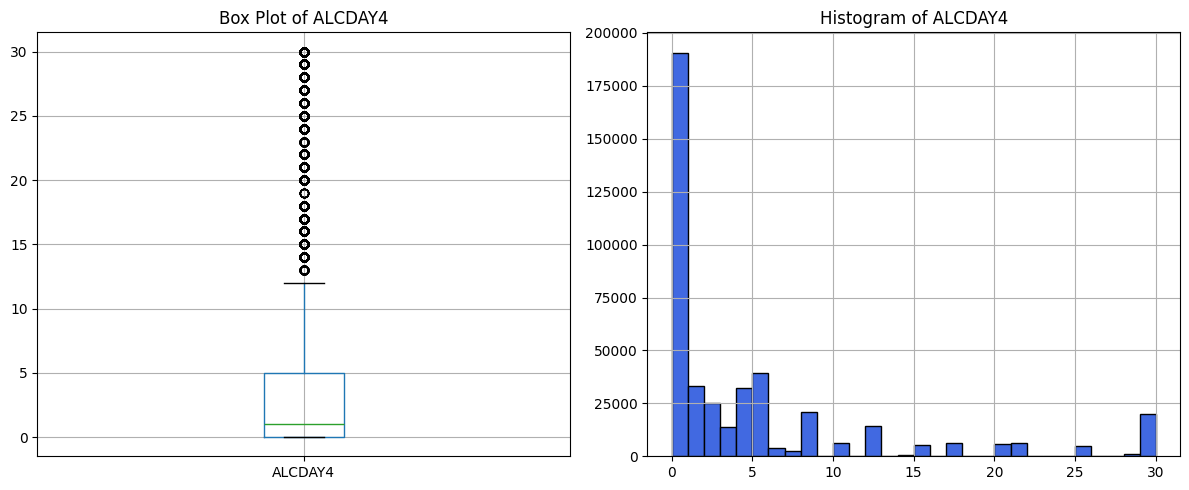

In [30]:
plot(df_filtered, "ALCDAY4")

HEIGHT3

In [31]:
def convert_height3(value):
    if value is not np.nan:
        if 199 < value < 712:
            return value // 100 + (value % 100)/12
        elif 9060 < value < 9999:
            return ((value % 9000)/100) * 3.28084       # convert to meters then convert back to feets
        else:
            return np.nan
    return np.nan

df_filtered.loc[:, "HEIGHT3"] = df_filtered["HEIGHT3"].apply(convert_height3)
df_filtered.loc[:, "HEIGHT3"] = df_filtered["HEIGHT3"].fillna(df_filtered["HEIGHT3"].mean())
df_filtered["HEIGHT3"].describe()

count    433323.000000
mean          5.585515
std           0.346606
min           2.000000
25%           5.333333
50%           5.583333
75%           5.833333
max          28.313649
Name: HEIGHT3, dtype: float64

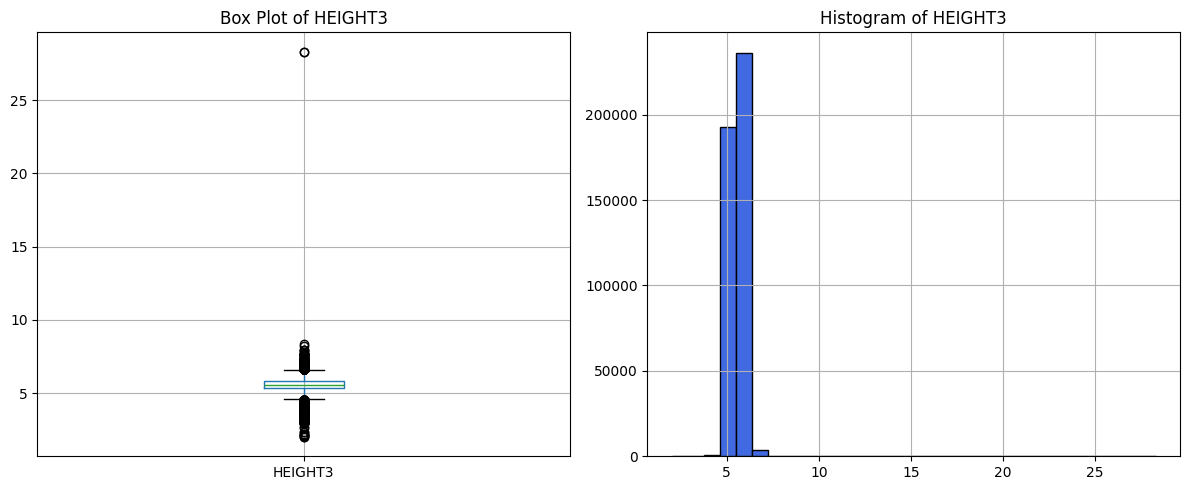

In [32]:
plot(df_filtered, "HEIGHT3")

MENTHLTH

In [33]:
def convert_day(value):
    if value is not np.nan:
        if 1 <= value <= 30:
            return value
        else:
            return np.nan
    return np.nan

df_filtered.loc[:, "MENTHLTH"] = df_filtered["MENTHLTH"].apply(convert_day)
df_filtered.loc[:, "MENTHLTH"] = df_filtered["MENTHLTH"].fillna(df_filtered["MENTHLTH"].mode()[0])
df_filtered["MENTHLTH"].describe()

count    433323.000000
mean         22.632701
std          11.181164
min           1.000000
25%          10.000000
50%          30.000000
75%          30.000000
max          30.000000
Name: MENTHLTH, dtype: float64

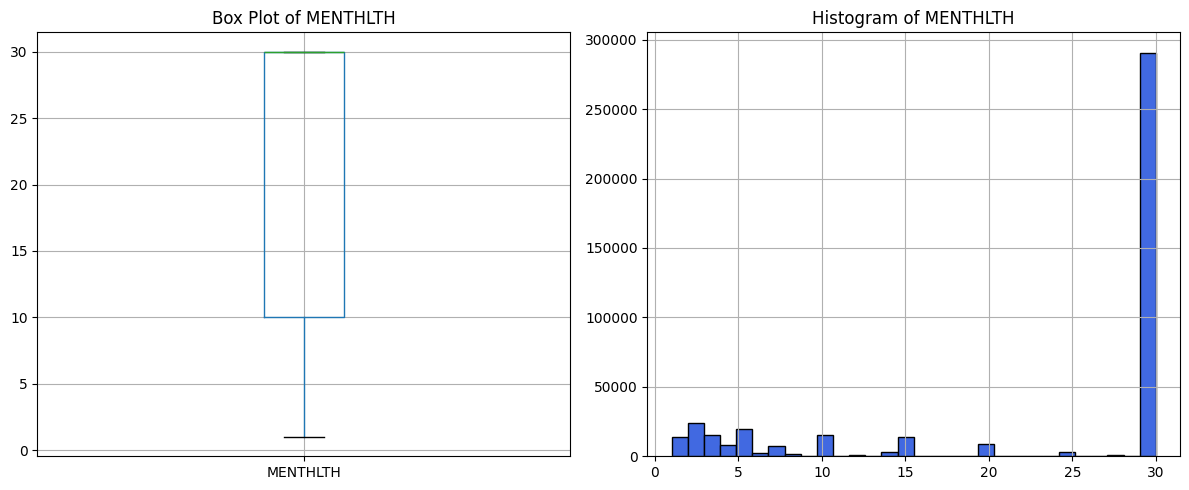

In [34]:
plot(df_filtered, "MENTHLTH")

PHYSHLTH

In [35]:
df_filtered.loc[:, "PHYSHLTH"] = df_filtered["PHYSHLTH"].apply(convert_day)
df_filtered.loc[:, "PHYSHLTH"] = df_filtered["PHYSHLTH"].fillna(df_filtered["PHYSHLTH"].mode()[0])
df_filtered["PHYSHLTH"].describe()

count    433323.000000
mean         22.880311
std          11.284828
min           1.000000
25%          14.000000
50%          30.000000
75%          30.000000
max          30.000000
Name: PHYSHLTH, dtype: float64

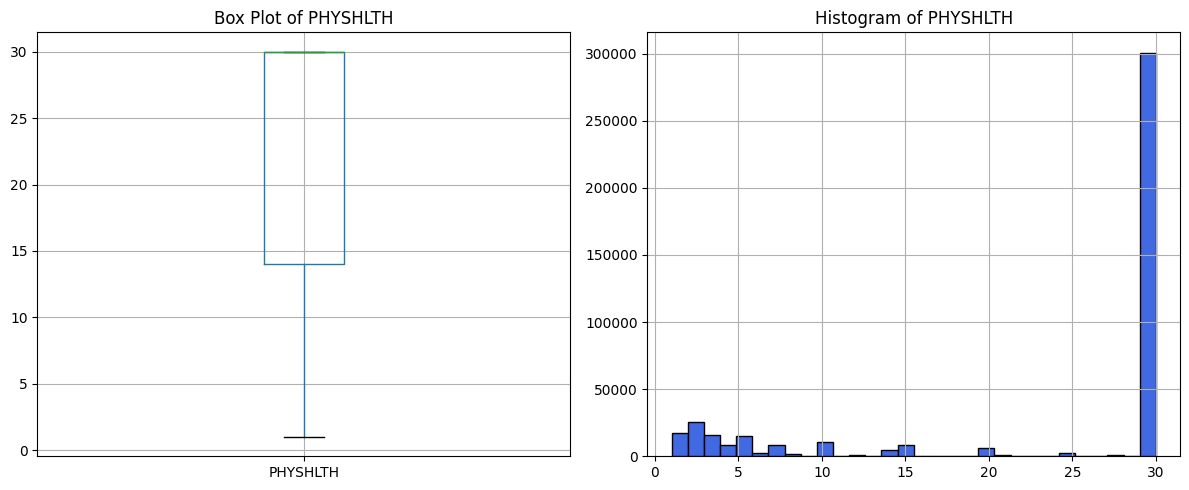

In [36]:
plot(df_filtered, "PHYSHLTH")

STRENGTH

In [37]:
df_filtered.loc[:, "STRENGTH"] = df_filtered["STRENGTH"].apply(convert_day_in_months)
df_filtered.loc[:, "STRENGTH"] = df_filtered["STRENGTH"].fillna(np.round(df_filtered["STRENGTH"].mean()))
df_filtered["STRENGTH"].describe()

count    433323.000000
mean          8.026052
std          14.931028
min           0.000000
25%           0.000000
50%           4.000000
75%          12.000000
max         424.000000
Name: STRENGTH, dtype: float64

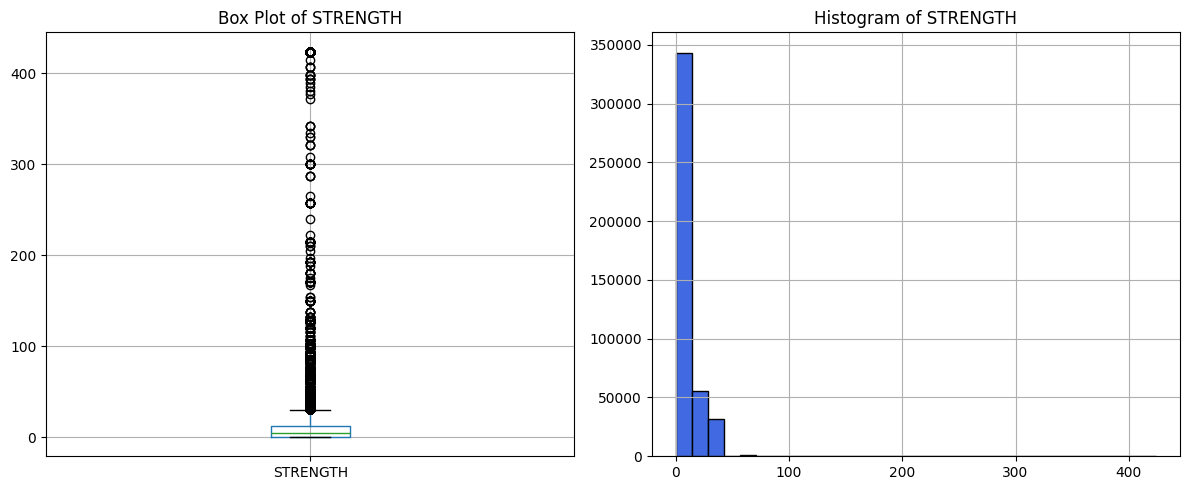

In [38]:
plot(df_filtered, "STRENGTH")

WEIGHT2

In [39]:
def convert_weight(value):
    if value is not np.nan:
        if 50 <= value <= 776:
            return value
        elif 9023 <= value <= 9352:
            return (value % 9000) * 2.20462
        else:
            return np.nan
    return np.nan

In [40]:
df_filtered.loc[:, "WEIGHT2"] = df_filtered["WEIGHT2"].apply(convert_weight)
df_filtered.loc[:, "WEIGHT2"] = df_filtered["WEIGHT2"].fillna(df_filtered["WEIGHT2"].mean())
df_filtered["WEIGHT2"].describe()

count    433323.000000
mean        182.745727
std          45.214995
min          50.000000
25%         150.000000
50%         180.000000
75%         203.000000
max         776.000000
Name: WEIGHT2, dtype: float64

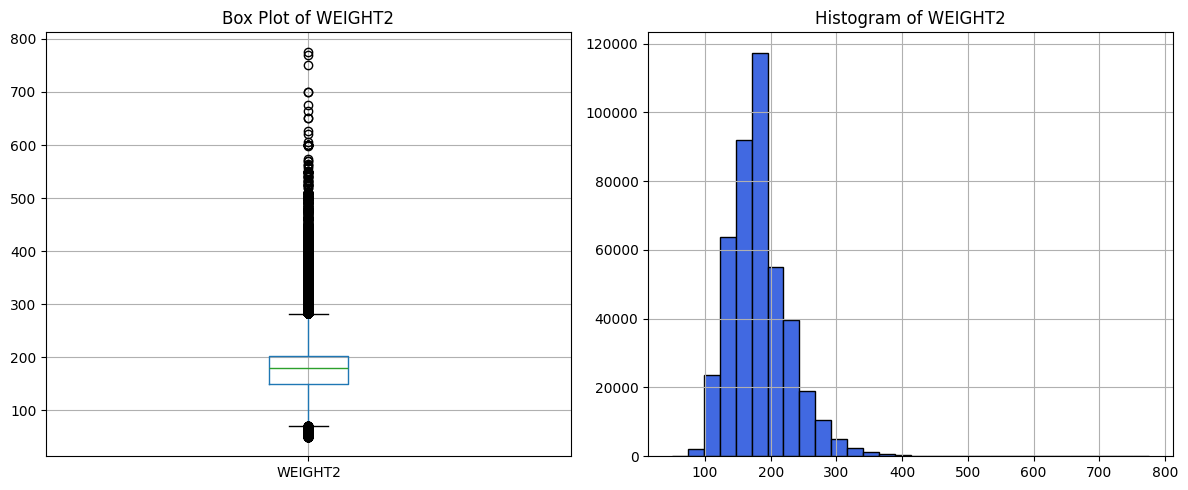

In [41]:
plot(df_filtered, "WEIGHT2")

_BMI5

In [42]:
def convert_BMI(value):
    if value is not np.nan:
        if 1 <= value <= 9999:
            return value / 100
        else:
            return np.nan
    return np.nan

In [43]:
df_filtered.loc[:, "_BMI5"] = df_filtered["_BMI5"].apply(convert_BMI)
df_filtered.loc[:, "_BMI5"] = df_filtered["_BMI5"].fillna(df_filtered["_BMI5"].mean())
df_filtered["_BMI5"].describe()

count    433323.000000
mean         28.479288
std           6.228480
min          12.020000
25%          24.390000
50%          28.170000
75%          31.090000
max          99.840000
Name: _BMI5, dtype: float64

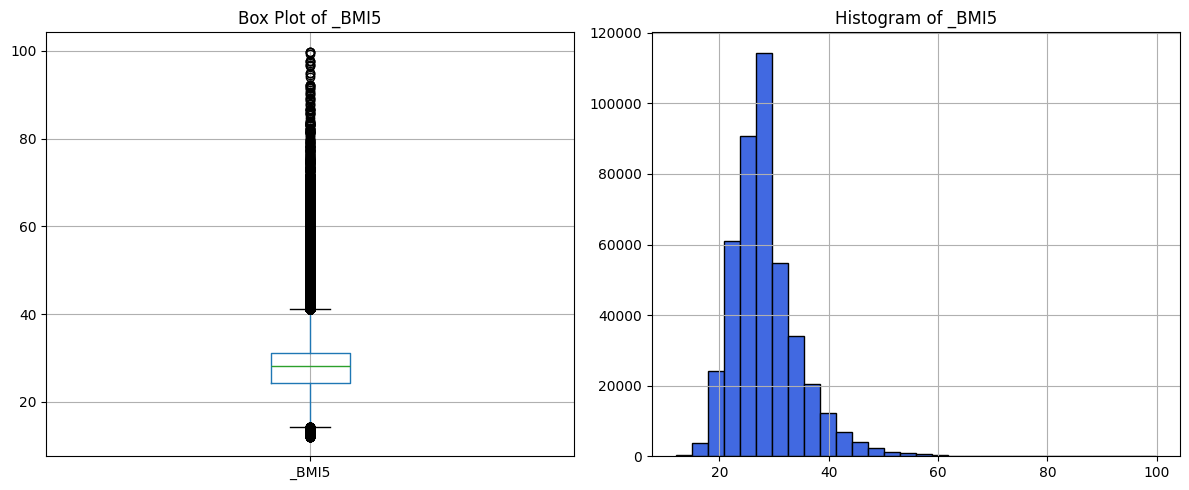

In [44]:
plot(df_filtered, "_BMI5")

In [45]:
missing_value_summary(df_filtered)

,Missing Count,Missing Percentage (%)
SEXVAR,0,0.0
_AGE80,0,0.0
_AGEG5YR,0,0.0
CVDINFR4,0,0.0
CVDCRHD4,0,0.0
CVDSTRK3,0,0.0
BPHIGH6,0,0.0
TOLDHI3,0,0.0
CHOLMED3,0,0.0
DIABETE4,0,0.0


### Handling Outlier

In [46]:
def convert_outlier_to_missing(df: pd.DataFrame, col: str):
    first_quantile = df[col].quantile(0.25)
    third_quantile = df[col].quantile(0.75)
    IQR = third_quantile - first_quantile
    lower_bound = first_quantile - 1.5 * IQR
    upper_bound = third_quantile + 1.5 * IQR
    df.loc[:, col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), np.nan, df[col])

In [47]:
cols = ['_BMI5', 'WEIGHT2', 'HEIGHT3', 'ALCDAY4', 'STRENGTH']
for col in cols:
    convert_outlier_to_missing(df_filtered, col)

missing_value_summary(df_filtered)

,Missing Count,Missing Percentage (%)
ALCDAY4,51119,11.80
_BMI5,17864,4.12
WEIGHT2,13057,3.01
STRENGTH,3678,0.85
HEIGHT3,1145,0.26
SEXVAR,0,0.00
_AGEG5YR,0,0.00
_AGE80,0,0.00
TOLDHI3,0,0.00
BPHIGH6,0,0.00


In [48]:
df_filtered.loc[:, "ALCDAY4"] = df_filtered["ALCDAY4"].fillna(np.round(df_filtered["ALCDAY4"].mean()))
df_filtered.loc[:, "HEIGHT3"] = df_filtered["HEIGHT3"].fillna(df_filtered["HEIGHT3"].mean())
df_filtered.loc[:, "STRENGTH"] = df_filtered["STRENGTH"].fillna(np.round(df_filtered["STRENGTH"].mean()))
df_filtered.loc[:, "WEIGHT2"] = df_filtered["WEIGHT2"].fillna(df_filtered["WEIGHT2"].mean())
df_filtered.loc[:, "_BMI5"] = df_filtered["_BMI5"].fillna(df_filtered["_BMI5"].mean())
missing_value_summary(df_filtered)


,Missing Count,Missing Percentage (%)
SEXVAR,0,0.0
_AGE80,0,0.0
_AGEG5YR,0,0.0
CVDINFR4,0,0.0
CVDCRHD4,0,0.0
CVDSTRK3,0,0.0
BPHIGH6,0,0.0
TOLDHI3,0,0.0
CHOLMED3,0,0.0
DIABETE4,0,0.0


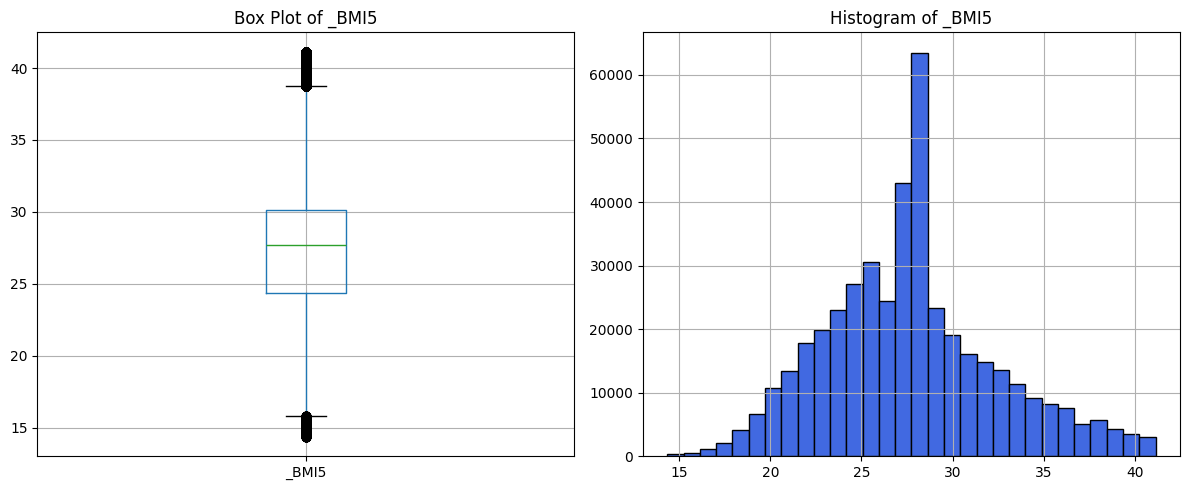

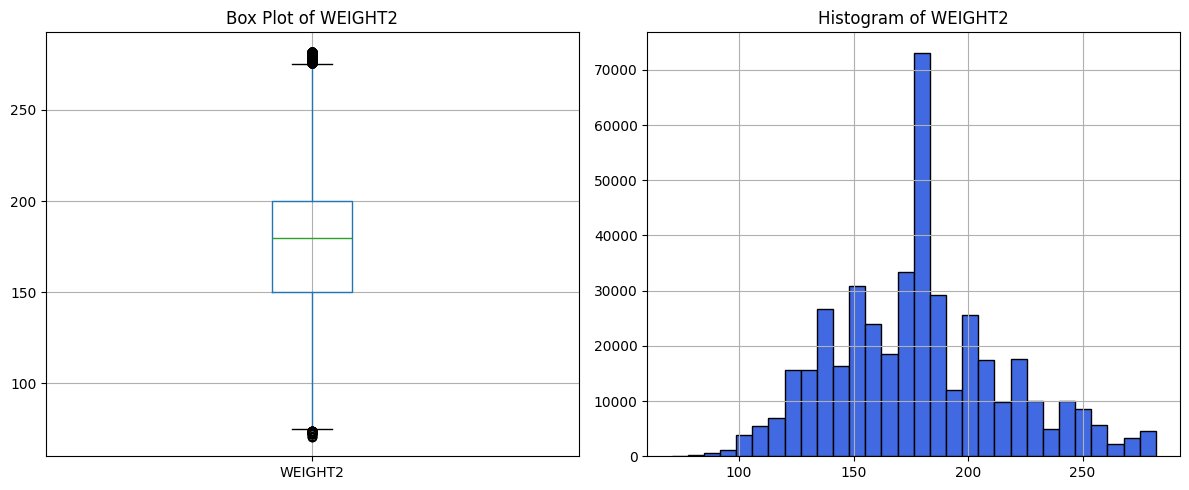

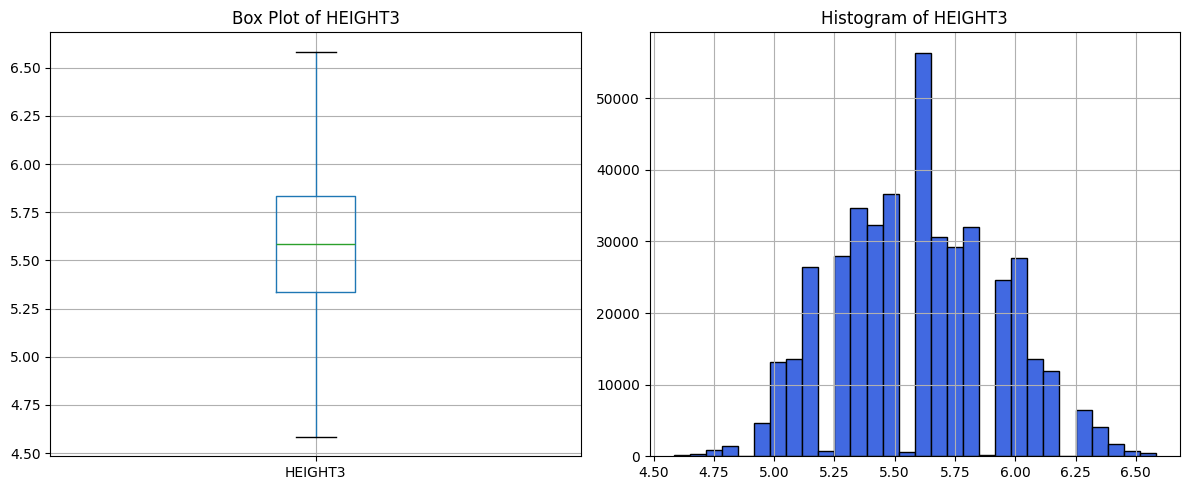

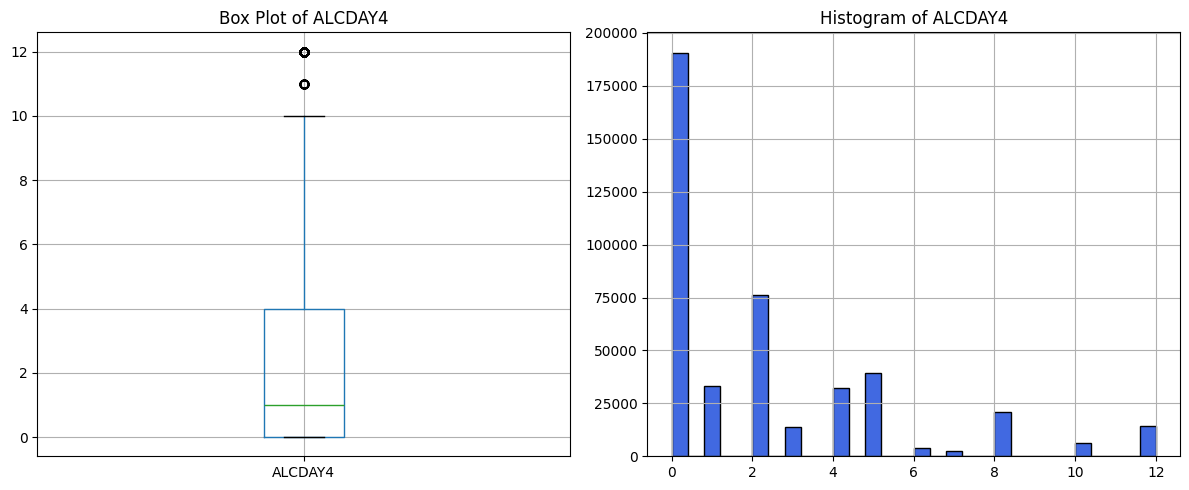

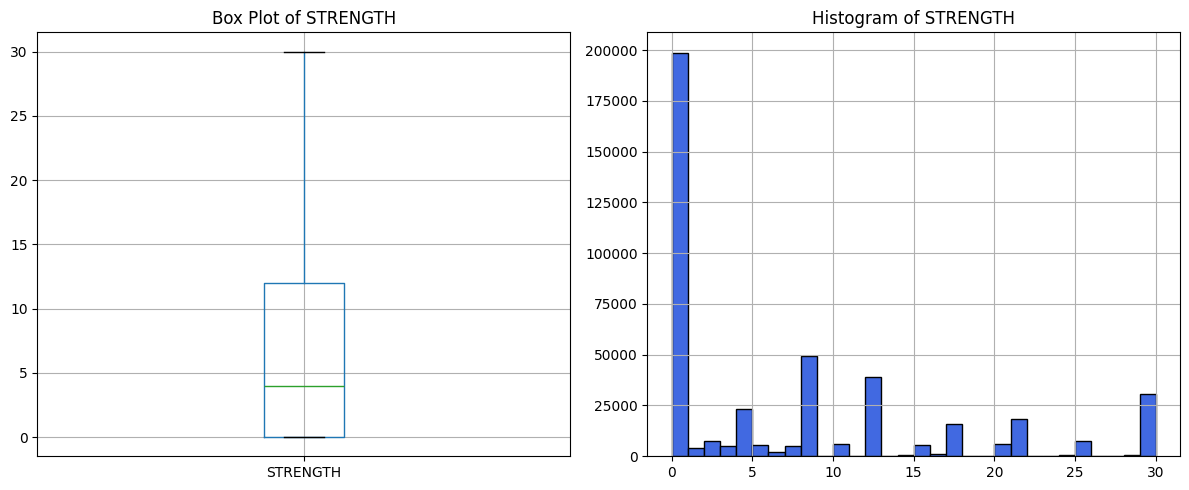

In [49]:
for col in cols:
    plot(df_filtered, col)

<Axes: >

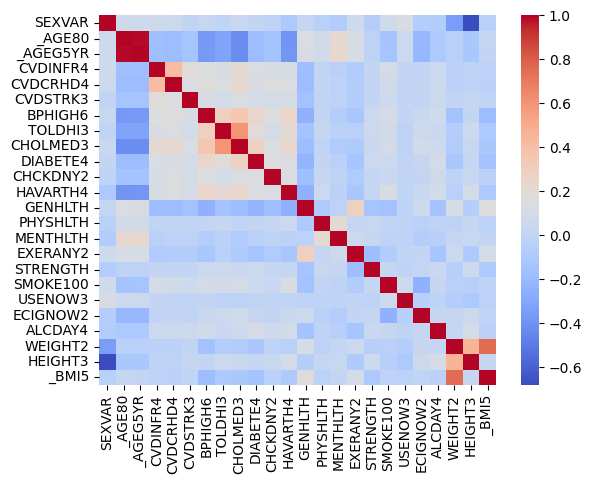

In [50]:
sns.heatmap(df_filtered.corr(), cmap='coolwarm')

#### Decoding the data

In [51]:
for var, values in value_labels_filtered.items():
    if var in category_features:
        # Convert non-null float values (1.0 → 1 → '1'), while keeping NaN unchanged
        df_filtered.loc[:, var] = df_filtered[var].apply(lambda x: str(int(x)) if pd.notna(x) and isinstance(x, float) and x.is_integer() else str(x) if pd.notna(x) else np.nan)

        # Map to labels, but keep original values where there's no match
        df_filtered.loc[:, var] = df_filtered[var].map(values).fillna(df_filtered[var]) 

In [52]:
for feature in discrete_features:
    df_filtered[feature] = df_filtered[feature].astype(int)

In [53]:
df_filtered.head()

,SEXVAR,_AGE80,_AGEG5YR,CVDINFR4,CVDCRHD4,CVDSTRK3,BPHIGH6,TOLDHI3,CHOLMED3,DIABETE4,CHCKDNY2,HAVARTH4,GENHLTH,PHYSHLTH,MENTHLTH,EXERANY2,STRENGTH,SMOKE100,USENOW3,ECIGNOW2,ALCDAY4,WEIGHT2,HEIGHT3,_BMI5
0,Female,80,Age 80 or older,No,No,No,Yes,No,No,Yes,No,No,Very good,30,30,No,0,No,Not at all,Never,0,172.0,5.250000,30.47
1,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Very good,30,30,Yes,0,No,Not at all,Never,0,132.0,4.750000,28.56
2,Female,80,Age 80 or older,No,No,No,Yes,Yes,Yes,No,No,Yes,Fair,6,2,Yes,5,Yes,Not at all,Never,0,130.0,5.333333,22.31
3,Female,78,Age 75 to 79,No,No,No,No,No,No,No,No,Yes,Very good,2,30,Yes,0,No,Not at all,Never,0,170.0,5.500000,27.44
4,Female,76,Age 75 to 79,No,No,No,Yes,No,No,Yes,No,Yes,Fair,30,30,Yes,0,No,Some days,Never,2,170.0,5.666667,25.85


In [54]:
df_filtered.to_csv('Modified Data/imputed_data.csv', index=False)

In [55]:
# for col in selected_features:
#     plt.figure(figsize=(10,5))
#     plt.hist(df_filtered[col], bins = 50, color='royalblue', edgecolor='black')
#     plt.xlabel(f"{sas_variable[col]} ({col})")
#     plt.title(f"Distribution of {sas_variable[col]}")
#     plt.show()
